<a href="https://colab.research.google.com/github/GustavoSilva95/Data_Science/blob/main/Projeto_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Gustavo Silva](https://www.linkedin.com/in/gustavo-vinicius-silva)*

---

# **Projeto Data Science - *Fraudes em Cartões de Crédito***

<center><img alt="Fraudes" width="100%" src="https://raw.githubusercontent.com/GustavoSilva95/Data_Science/main/Imagens/Detectando%20Fraudes%20em%20Cart%C3%B5es%20de%20Cr%C3%A9dito.png"></center>



O problema das fraudes em cartões de crédito é uma das principais preocupações das instituições financeiras como bancos e *fintechs*.

A fraude de cartão de crédito ocorre quando uma pessoa **não autorizada** obtém acesso às informações do usuário e as usa para fazer compras. Muitas vezes esses crimes são cometidos por **quadrilhas especializadas** que buscam brechas em sistemas de segurança ou contam com o descuido do próprio usuário. Segundo o [**Mapa da Fraude**](https://iabbrasil.com.br/pesquisa-mapa-da-fraude-2021/), a chegada da pandemia mudou rapidamente os hábitos de consumo de bens e serviços, que passaram a acontecer quase que exclusivamente em **ambientes virtuais**, aumentando a incidência de tentativas de fraudes.

Em eventual fraude comunicada pelo usuário, cabe a instituição analisar e cobrir o prejuízo. De modo a evitar essas perdas, as instituições utilizam sistemas de segurança que podem bloquear uma compra suspeita. Porém, se essa compra é legítima, esse procedimento pode causar estresse e constrangimento ao usuário.

Diante disso, investimentos na área de detecção de fraudes através de **Inteligência Artificial** vem crescendo a cada ano, na tentativa de diminuir perdas com **transações fraudulentas** e melhorar a **satisfação do usuário**.

Neste projeto, algoritmos de ***Machine Learning*** serão aplicados a esse problema e serão avaliados quanto a sua capacidade de previsão, buscando justamente a otimização entre reduzir as perdas pela instituição financeira e, ao mesmo tempo, evitar o bloqueio de uma compra legítima. 



# **Obtenção dos Dados**

---

O [conjunto de dados usado neste projeto](https://www.kaggle.com/mlg-ulb/creditcardfraud) contém transações feitas por cartões de crédito, que ocorreram no período de dois dias, por titulares de cartões europeus.

Por questões ligadas à privacidade e segurança, foi aplicado uma transformação nos atributos originais, conhecida como **Análise de Componentes Principais** (Principal Component Analysis - PCA). A PCA é uma das técnicas mais comuns de redução de dimensionalidade. Reduzir a dimensionalidade significa diminuir o número de atributos (características, variáveis). O algoritmo de PCA faz a redução tentando preservar ao máximo a variância dos atributos.

Assim, o algoritmo de PCA cria um sistema de atributos chamados **componentes**, onde cada componente é uma combinação linear dos atributos originais. Mais detalhes de como funciona o algoritmo de PCA podem ser encontrados [neste link](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

Portanto, para este conjunto de dados, os atributos V1, V2, … V28 são os principais componentes obtidos com PCA. As únicas características que não foram transformadas com PCA são `Time` e `Amount`. O atributo `Time` contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso `Amount` é o valor da transação. Já o atributo `Class` é a variável de resposta e assume valor **1** em caso de fraude e **0** para transações autênticas. No total, o conjunto de dados possui **31 características** de aproximadamente **285 mil transações**.

In [1]:
!pip install -q scikit-plot

In [2]:
# Importando as Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scikitplot as skplt
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
# Importando o conjunto de dados e criando um DataFrame
file_path = 'https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1'
df_credit = pd.read_csv(file_path)

In [4]:
# Tamanho do Dataset
print('-' * 20)
print('Tamanho do Dataset:')
print('-' * 20)
print(f'Entradas: {df_credit.shape[0]}')
print(f'Variáveis: {df_credit.shape[1]}\n')

# Visualizando as 5 primeiras entradas
df_credit.head()

--------------------
Tamanho do Dataset:
--------------------
Entradas: 284807
Variáveis: 31



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Análise Exploratória**

---

Com os dados importado para dentro de uma estrutura *DataFrame*, pode-se iniciar a análise exploratória com a finalidade de examinar os dados e resumir suas principais características, para que posteriormente possa ser aplicado um tratamento adequado a esses dados.

#### **Tipo dos Dados**

In [ ]:
# Verificando o tipo dos dados de cada variável
df_credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#### **Dados *Missing***

In [ ]:
# Verificando se há valores ausentes
df_credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

O *dataset* possui apenas atributos numéricos e não apresenta dados *missing* (faltantes). Portanto, isso indica que antes de ter sido submetido ao PCA, o *dataset* passou por um pré-processamento dos dados.

#### **Resumo Estatístico**
Com o resumo estatístico foi possível notar que:
- Os atributos que passam pelo PCA (`V1`, `V2`, ... `V28`) estão em uma mesma ordem de grandeza. Já os atributos `Amount` e `Time` precisarão ser normalizados.
- Outro ponto importante é o valor mínimo encontrado no atributo `Amount` ser 0 (zero), visto que esta variável indica o valor da transação. Não foi especificado o significado do valor da transação ser 0 e diante disso será necessário fazer uma análise mais detalhada para decidir como tratar esses dados.
- Além disso, o atributo `Amount` apresenta claramente a presença de *outliers* (dados discrepantes), que também serão analisados.
 


In [ ]:
# Resumo estatístico do conjunto de dados
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### **Analisando Valores de Transação**

In [ ]:
# Quantidade de Transações com valor 0
zero = (df_credit['Amount'] == 0).sum()
print('-'*27)
print('  Transações com valor 0')
print('-'*27)
print(f'Quantidade Absoluta: {zero}')
print(f'Quantidade Relativa: {(zero / df_credit.shape[0])*100:.2f}%')

---------------------------
  Transações com valor 0
---------------------------
Quantidade Absoluta: 1825
Quantidade Relativa: 0.64%


É possível notar que a quantidade de transações registradas como 0 é muito pequena em relação ao conjunto de dados. São 1825 registros com transações de 0, representando apenas 0.64% de todo o *dataset*. Como a quantidade é irrelevante e o fato de não haver informações disponíveis sobre o significado de 0 para esse atributo, esses dados serão mantidos com o valor 0.

#### **Analisando *Outliers***

Através do resumo estatístico do atributo `Amount` separando as transações autênticas e fraudulentas é possível notar a diferença em relação a média, mediana e os *outliers* de ambas as classes.

In [ ]:
# Resumo estatístico do atributo Amount referente a transações autênticas
df_credit['Amount'][df_credit['Class']==0].describe().round(2)

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64

In [ ]:
# Resumo estatístico do atributo Amount referente a transações fraudulentas
df_credit['Amount'][df_credit['Class']==1].describe().round(2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

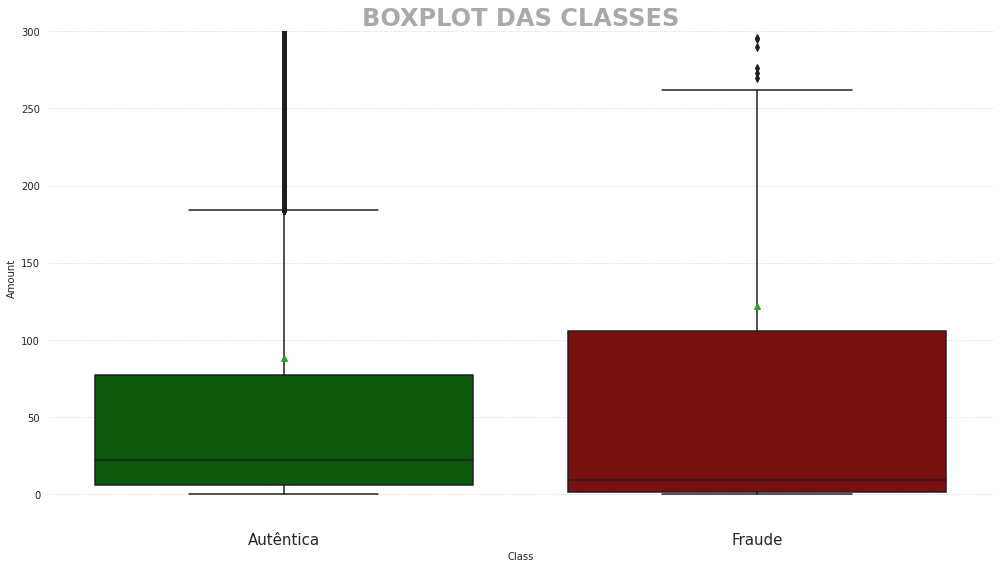

In [6]:
cor = {classe: "darkgreen" if classe == 0 else "darkred" for classe in df_credit['Class'].unique()}
fig, ax = plt.subplots(figsize=(14, 8))
sns.set_style('white')

sns.boxplot(df_credit.Class, df_credit.Amount, showmeans=True, palette=cor, ax=ax)
plt.ylim((-20, 300))
plt.xticks([0, 1], ['Autêntica', 'Fraude'], fontsize=15)
ax.set_title('BOXPLOT DAS CLASSES',fontsize=24, color='darkgray', weight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(axis='y', linestyle='dotted')

plt.tight_layout()

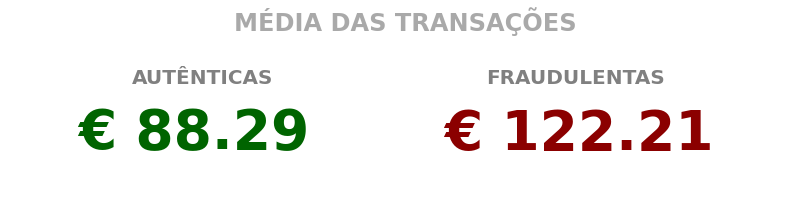

In [ ]:
# Média das transações
media_autentica = df_credit['Amount'][df_credit['Class']==0].mean()
media_fraude    = df_credit['Amount'][df_credit['Class']==1].mean()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))
fig.text(x= 0.35, y= 0.9 ,s='MÉDIA DAS TRANSAÇÕES',
        fontsize=24, color='darkgray', weight='bold')
ax1.text(x= 0.35, y= 0.7 ,s='AUTÊNTICAS',
        fontsize=20, color='gray', weight='bold')
ax1.text(x= 0.2, y= 0.3 ,s=f'€ {media_autentica:.2f}', fontsize=55, color='darkgreen', weight='bold')

ax1.set_yticklabels([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.text(x= 0.15, y= 0.7 ,s='FRAUDULENTAS',
        fontsize=20, color='gray', weight='bold')
ax2.text(x= 0.03, y= 0.3 ,s=f'€ {media_fraude:.2f}', fontsize=55, color='darkred', weight='bold')

ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

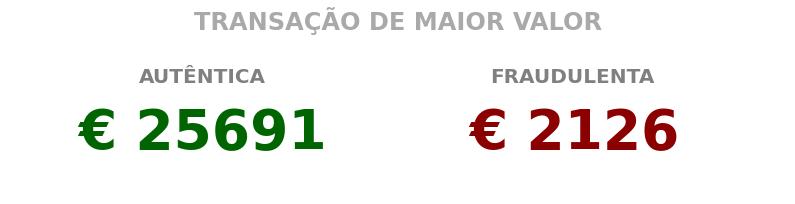

In [9]:
# Transação de maior valor
maior_autentica = df_credit['Amount'][df_credit['Class']==0].max()
maior_fraude    = df_credit['Amount'][df_credit['Class']==1].max()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))
fig.text(x= 0.31, y= 0.9 ,s='TRANSAÇÃO DE MAIOR VALOR',
        fontsize=24, color='darkgray', weight='bold')
ax1.text(x= 0.37, y= 0.7 ,s='AUTÊNTICA',
        fontsize=20, color='gray', weight='bold')
ax1.text(x= 0.2, y= 0.3 ,s=f'€ {maior_autentica:.0f}', fontsize=55, color='darkgreen', weight='bold')

ax1.set_yticklabels([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.text(x= 0.16, y= 0.7 ,s='FRAUDULENTA',
        fontsize=20, color='gray', weight='bold')
ax2.text(x= 0.1, y= 0.3 ,s=f'€ {maior_fraude:.0f}', fontsize=55, color='darkred', weight='bold')

ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

Apesar de a média das transações fraudulentas ser maior, os maiores valores para o atributo `Amount` estão ocorrendo em transações autênticas. Desta forma, a princípio esses valores discrepantes, ao serem **normalizados**, podem contribuir para o treinamento do modelo.

#### **Dados Desbalanceados**

Outro ponto que chamou atenção no resumo estatístico separado por classes foi a diferença na quantidade de transações em cada uma das classes, fazendo com que o conjunto de dados fique desbalanceado.
O desbalanceamento é comum em datasets como esse que registram fraudes, visto que existem muito mais transações autênticas no cotidiano do que as fraudulentas.


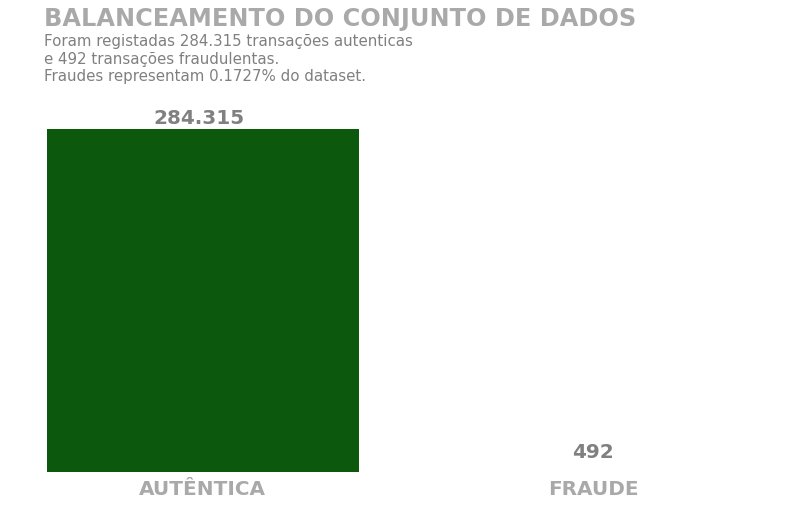

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(df_credit['Class'], palette=cor)

autenticas = '{:,}'.format(int((df_credit.Class ==0).sum())).replace(',','.')
fraudes    = '{:,}'.format(int((df_credit.Class ==1).sum())).replace(',','.')

fig.text(x= 0.162 , y= 0.9 , s='BALANCEAMENTO DO CONJUNTO DE DADOS',
        fontsize=24, color='darkgray', weight='bold')
fig.text(x= 0.162 , y= 0.865 , s=f'Foram registadas {autenticas} transações autenticas',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.835 , s=f'e {fraudes} transações fraudulentas.',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.805 , s='Fraudes representam 0.1727% do dataset.',
        fontsize=15, color='gray')

fig.text(x= 0.27 , y= 0.73 , s=autenticas,
        fontsize=20, color='gray', weight='bold')
fig.text(x= 0.685 , y= 0.15 , s=fraudes,
        fontsize=20, color='gray', weight='bold')

ax.set_ylim(0, 360000)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels(['AUTÊNTICA', 'FRAUDE'], fontsize=20, color='darkgray', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

O balanceamento dos dados será tratado com mais detalhes durante a etapa de pré-processamento.

# **Pré-processamento dos Dados**

---

Obtida as principais características do conjunto de dados, dá-se início a etapa onde será aplicado os tratamentos necessários identificados durante a análise exploratória, além da definição das variáveis preditoras e a separação dos dados em treino e teste. O propósito é de preparar o conjunto de dados para a aplicação dos algoritmos de *Machine Learning*, que geralmente são afetados pelo estado dos dados.

Além disso, foi usado ***Pipeline*** para que o pré-processamento pudesse ser aplicado com a função ***GridSearchCV*** (será mencionado mais a frente). Por conta disso, algumas etapas do pré-processamento, como balanceamento e normalização, serão aplicadas durante o ajuste dos algoritmos e posteriormente serão aplicadas novamente antes da criação dos modelos finais. Isso é feito para que não haja vazamento de dados no uso do *GridSearchCV*. Esse processo é abordado detalhadamente [neste artigo]( https://machinelearningmastery.com/data-preparation-without-data-leakage/).

#### **Atributos Preditores e Atributo Alvo**

Todos os atributos foram selecionados como preditores, exceto o atributo `Class` que é o alvo desse projeto e o atributo `Time` que não aparenta ser relevante para a predição do modelo.  

In [11]:
# Definindo os atributos preditores e o atributo alvo
x = df_credit.drop(['Class','Time'], axis=1)
y = df_credit['Class']

#### **Dados de Treino e Teste**



In [13]:
# Separando os dados em Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### **Balanceamento dos Dados**

Como mencionado, o problema de dados desbalanceados é típico da área de classificação de dados.  A aplicação de estratégias de **reamostragem** se apresenta como uma solução eficaz para o problema de desbalanceamento. A estratégia mais simples é escolher exemplos para o conjunto de dados transformado aleatoriamente, chamada **reamostragem aleatória**.

***Oversampling*** e ***undersampling*** são as principais técnicas de reamostragem aleatória para conjunto de dados de classificação desbalanceados, onde:
- ***Random Oversampling***: Cria exemplos duplicados aleatoriamente na classe minoritária.
- ***Random Undersampling***: Exclui aleatoriamente exemplos na classe majoritária.

Os conceitos da estratégia de reamostragem aleatória podedem ser aprofundados através da [documentação oficial](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html).

Neste projeto optou-se por usar o ***Random Undersampling***.


In [ ]:
# Balanceamento que será usado no Pipeline
balanceamento = RandomUnderSampler()

#### **Normalização dos Dados**

Foi usado a normalização ***StandardScaler***. Está técnica normaliza os dados a partir da fórmula:

$$
Z = \frac{(x - \mu)}{s}
$$

Onde **$\mu$** é a média e **'s'** é o desvio padrão.

In [ ]:
# Normalização que será usado no Pipeline
norm = StandardScaler()

#***Machine Learning***

---

<center><img alt="Machine Learning" width="100%" src="https://raw.githubusercontent.com/GustavoSilva95/Data_Science/main/Imagens/MachineLearning.png"></center>

## **Ajuste dos Algoritmos de *Machine Learning***

Os algoritmos de *Machine Learning* serão treinados utilizando 70% do conjunto de dados, e serão avaliados através os dados de teste que representam 30% do dataset. A primeira etapa busca encontrar os hiperparâmetros que obtenham o melhor **AUC** (*Area Under the Curve*) a partir dos dados de treino. Para entender a AUC é preciso começar pela **Matriz de Confusão** (*Confusion Matrix*).

###Confusion Matrix
A matriz de confusão mostra em uma matriz o total de acertos e erros de um modelo.

<center><img alt="Matriz" width="50%" src="https://raw.githubusercontent.com/GustavoSilva95/Data_Science/main/Imagens/matriz.png"></center>

Para facilitar o entendimento da matriz de confusão, considere os resultados de um teste de tumor, onde:

* **Verdadeiro negativo - VN:** Por exemplo, quando o paciente não tem tumor maligno e o modelo classifica como não tendo tumor maligno.

* **Falso negativo - FN**: Por exemplo, quando o paciente tem tumor maligno e o modelo classifica como não tendo tumor maligno.

* **Verdadeiro positivo - VP:** Por exemplo, quando o paciente tem tumor maligno e o modelo classifica como tendo tumor maligno.

* **Falso positivo - FP:** Por exemplo, quando o paciente não tem tumor maligno e o modelo classifica como tendo tumor maligno.

Para encontrar a **AUC** é necessário construir a **Curva ROC** (Receiver Operating Characteristic). De maneira resumida, a **Curva ROC** é encontrada escolhendo *Threshold* (limiar, ponto de corte) diferentes, e para cada *Threshold* adotado existe uma matriz de confusão diferente. Duas taxas de cada matriz são importantes para construir a **Curva ROC**, são elas:

$$
Taxa VP = \frac{VP}{VP+FN}
$$
-
$$
Taxa FP = \frac{FP}{FP+VN}
$$

Assim, cada *Threshold* adotado tem-se uma matriz de confusão e cada matriz tem uma **Taxa VP** (taxa de verdadeiro positivo) e uma **Taxa FP** (taxa de falso positivo). Onde, a melhor combinação possível seria uma **Taxa VP** de 1 e uma **Taxa FP** de 0.

Cada ponto é marcado em um gráfico e a união dos pontos forma a **Curva ROC**. No mesmo gráfico é marcado os pontos de extremo, ou seja, onde se adota *Threshold* = 0 e *Threshold* = 1. Traça-se então uma reta entre esses dois pontos. A área entre a **Curva ROC** e os pontos de extremo é a **AUC**.

<center><img alt="Curva ROC" width="40%" src="https://raw.githubusercontent.com/GustavoSilva95/Data_Science/main/Imagens/Taxa%20VP.png"></center

## **Ajuste dos Modelos**

Nesta etapa o objetivo é encontrar o ajuste dos **hiperparâmetros** de cada modelo, tendo como meta o melhor **AUC** como descrito acima. O ***Scikit-Learn*** fornece um recurso para avaliar facilmente diversas variações de hiperparâmetros de algoritmos, a função ***GridSearchCV***. Detalhes da função pode ser encontrada na [documentação oficial](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

#### **Logistic Regression**

In [ ]:
# Definindo o Modelo
modeloLR = LogisticRegression(solver='liblinear')

# Criando um dicionário com os parâmetros que serão combinados
parametrosLR = {'modelo__penalty':['l1', 'l2'], 'modelo__C':np.logspace(-2, 2, 14)}

# Criando o Pipeline
pipe = Pipeline([('balanceamento',balanceamento), ('normalização',norm), ('modelo', modeloLR)])

# Criando o Modelo parametrizado
modeloLR_parametrizado = GridSearchCV(pipe, parametrosLR, cv=10, scoring='roc_auc')
modeloLR_parametrizado.fit(x_train, y_train)

# Resultado
print('-'*30)
print('Resultado Logistic Regression')
print('-'*30)
print(f'AUC: {modeloLR_parametrizado.best_score_:.2f}')
print(f'Penalty: {modeloLR_parametrizado.best_params_["modelo__penalty"]}')
print(f'C: {modeloLR_parametrizado.best_params_["modelo__C"]:.2f}')

------------------------------
Resultado Logistic Regression
------------------------------
AUC: 0.98
Penalty: l2
C: 0.08


#### **KNN**

In [ ]:
# Definindo o Modelo
modeloKNN = KNeighborsClassifier()

# Criando um dicionário com os parâmetros que serão combinados
parametrosKNN = {'modelo__n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17], 'modelo__p':[1, 2, 3, 4], 'modelo__metric':['minkowski', 'chebyshev']}

# Criando o Pipeline
pipe = Pipeline([('balanceamento',balanceamento), ('normalização',norm), ('modelo',modeloKNN)])

# Criando Modelo parametrizado
modeloKNN_parametrizado = GridSearchCV(pipe, parametrosKNN, cv=10, scoring='roc_auc')
modeloKNN_parametrizado.fit(x_train, y_train)

# Resultado
print('-'*15)
print('Resultado KNN')
print('-'*15)
print(f'AUC: {modeloKNN_parametrizado.best_score_:.2f}')
print(f'n_neighbors: {modeloKNN_parametrizado.best_params_["modelo__n_neighbors"]}')
print(f'p: {modeloKNN_parametrizado.best_params_["modelo__p"]}')
print(f'metric: {modeloKNN_parametrizado.best_params_["modelo__metric"]}')


---------------
Resultado KNN
---------------
AUC: 0.97
n_neighbors: 17
p: 1
metric: minkowski


#### **Decision Trees**

In [ ]:
# Definindo o Modelo
modeloDT = DecisionTreeClassifier()

# Criando um dicionário com os parâmetros que serão combinados
parametrosDT = {'modelo__min_samples_split':[2, 3, 4, 5, 6],
                'modelo__max_depth':[3, 4, 5, 6, 7, 8, 9],
                'modelo__criterion':['gini', 'entropy']}

# Criando o Pipeline
pipe = Pipeline([('balanceamento',balanceamento), ('normalização',norm), ('modelo',modeloDT)])

# Criando Modelo parametrizado
modeloDT_parametrizado = GridSearchCV(pipe, parametrosDT, cv=10, scoring='roc_auc')
modeloDT_parametrizado.fit(x_train, y_train)

#Resultado
print('-'*25)
print('Resultado Decision Trees')
print('-'*25)
print(f'AUC: {modeloDT_parametrizado.best_score_:.2f}')
print(f'min_samples_split: {modeloDT_parametrizado.best_params_["modelo__min_samples_split"]}')
print(f'max_depth: {modeloDT_parametrizado.best_params_["modelo__max_depth"]}')
print(f'criterion: {modeloDT_parametrizado.best_params_["modelo__criterion"]}')


-------------------------
Resultado Decision Trees
-------------------------
AUC: 0.96
min_samples_split: 5
max_depth: 3
criterion: entropy


## **Avaliação dos Algoritmos de *Machine Learning***

Com os hiperparâmetros encontrados, o próximo passo será a criação dos modelos finais. Antes, porém, é necessário aplicar o pré-processamento nos dados de treino e teste, visto que na etapa anterior foi usado o ***Pipeline*** para evitar o vazamento de dados durante o ajuste dos hiperparâmetros. 

#### **Pré-processamento**

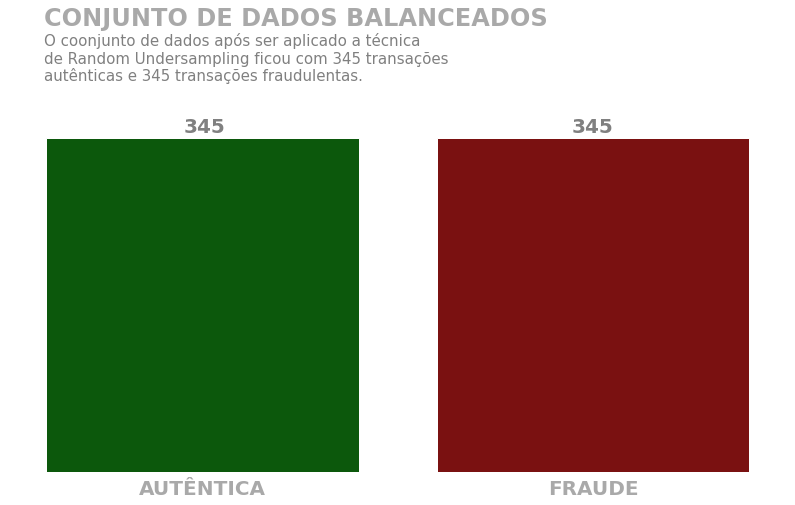

In [14]:
# balanceando os dados de Treino
rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)

# Plotar a nova distribuição de classes
cor2 = {classe: "darkgreen" if classe == 0 else "darkred" for classe in y_train.unique()}
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(y_train, palette=cor2, ax=ax)

autenticas = (y_train==0).sum()
fraudes    = (y_train==1).sum()

fig.text(x= 0.162 , y= 0.9 , s='CONJUNTO DE DADOS BALANCEADOS',
        fontsize=24, color='darkgray', weight='bold')
fig.text(x= 0.162 , y= 0.865 , s='O coonjunto de dados após ser aplicado a técnica',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.835 , s=f'de Random Undersampling ficou com {autenticas} transações',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.805 , s=f'autênticas e {fraudes} transações fraudulentas.',
        fontsize=15, color='gray')

fig.text(x= 0.3 , y= 0.715 , s=autenticas,
        fontsize=20, color='gray', weight='bold')
fig.text(x= 0.685 , y= 0.715 , s=fraudes,
        fontsize=20, color='gray', weight='bold')


ax.set_ylim(0, 450)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels(['AUTÊNTICA', 'FRAUDE'], fontsize=20, color='darkgray', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

In [ ]:
# Criando um normalizador usando o conjunto de treino
normalizador = StandardScaler().fit(x_train)

# Normalizando os dados de treino
x_train = normalizador.transform(x_train)

# Normalizando os dados de teste
x_test = normalizador.transform(x_test)

#### **Logistic Regression**

In [ ]:
# Definindo o Modelo
modeloLR = LogisticRegression(penalty='l2', C=0.08, solver='liblinear')

# Treinando o Modelo
modeloLR.fit(x_train, y_train)

# Previsão usando os dados de teste
y_predLR = modeloLR.predict(x_test)
y_probLR = modeloLR.predict_proba(x_test)[:,1]

# Exibindo o resultado
print('-'*50)
print('          Resultado Logistic Regression')
print('-'*50)
print(classification_report(y_test, y_predLR, digits=4))
print(f'AUC: {roc_auc_score(y_test, y_predLR):.4f}')

--------------------------------------------------
          Resultado Logistic Regression
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.9998    0.9909    0.9953     85296
           1     0.1416    0.8707    0.2436       147

    accuracy                         0.9907     85443
   macro avg     0.5707    0.9308    0.6194     85443
weighted avg     0.9983    0.9907    0.9940     85443

AUC: 0.9308


#### **KNN**

In [ ]:
# Definindo o Modelo
modeloKNN = KNeighborsClassifier(n_neighbors=17, p=1, metric='minkowski')

# Treinando o Modelo
modeloKNN.fit(x_train, y_train)

# Previsão usando os dados de teste
y_predKNN = modeloKNN.predict(x_test)
y_probKNN = modeloKNN.predict_proba(x_test)[:,1]

# Exibindo o Resultado
print('-'*50)
print('                 Resultado KNN')
print('-'*50)
print(classification_report(y_test, y_predKNN, digits=4))
print(f'AUC: {roc_auc_score(y_test, y_predKNN):.4f}')

--------------------------------------------------
                 Resultado KNN
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.9997    0.9948    0.9973     85296
           1     0.2193    0.8503    0.3487       147

    accuracy                         0.9945     85443
   macro avg     0.6095    0.9226    0.6730     85443
weighted avg     0.9984    0.9945    0.9961     85443

AUC: 0.9226


#### **Decision Trees**

In [ ]:
# Definindo o Modelo
modeloDT = DecisionTreeClassifier(min_samples_split=5, max_depth=3, criterion='entropy')

# Treinando o Modelo
modeloDT.fit(x_train, y_train)

# Previsão usando os dados de teste
y_predDT = modeloDT.predict(x_test)
y_probDT = modeloDT.predict_proba(x_test)[:,1]

# Exibindo o Resultado
print('-'*50)
print('             Resultado Decision Trees')
print('-'*50)
print(classification_report(y_test, y_predDT, digits=4))
print(f'AUC: {roc_auc_score(y_test, y_predDT):.4f}')

--------------------------------------------------
             Resultado Decision Trees
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.9998    0.9711    0.9852     85296
           1     0.0490    0.8639    0.0928       147

    accuracy                         0.9709     85443
   macro avg     0.5244    0.9175    0.5390     85443
weighted avg     0.9981    0.9709    0.9837     85443

AUC: 0.9175


#### **Confusion Matrix**

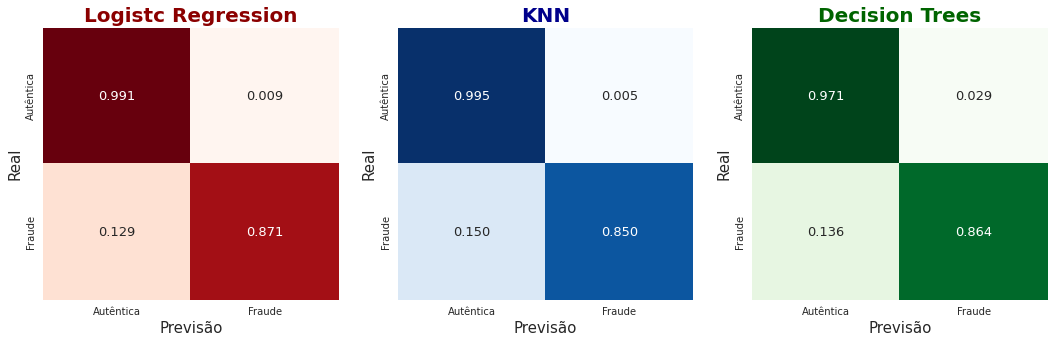

In [ ]:
# Exibindo a confusion matrix dos modelos
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Confusion Matrix Logistc Regression
sns.heatmap(confusion_matrix(y_test, y_predLR, normalize='true'),
            cmap='Reds', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax1)
ax1.set_ylabel('Real', fontsize=15)
ax1.set_xlabel('Previsão', fontsize=15)
ax1.set_title('Logistc Regression', fontsize=20, color='darkred', weight='bold')

# Confusion Matrix KNN
sns.heatmap(confusion_matrix(y_test, y_predKNN, normalize='true'),
            cmap='Blues', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax2)
ax2.set_ylabel('Real', fontsize=15)
ax2.set_xlabel('Previsão', fontsize=15)
ax2.set_title('KNN', fontsize=20, color='darkblue', weight='bold')

# Confusion Matrix Decision Trees
sns.heatmap(confusion_matrix(y_test, y_predDT, normalize='true'),
            cmap='Greens', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax3)
ax3.set_ylabel('Real', fontsize=15)
ax3.set_xlabel('Previsão', fontsize=15)
ax3.set_title('Decision Trees', fontsize=20, color='darkgreen', weight='bold')

plt.show()

Por meio do conjunto de testes, verificou-se que a **AUC** alcançada ficou abaixo da **AUC** obtida com os dados de treino para todos os modelos. Valores semelhantes são esperados para predições de novos dados.  O objetivo, no entanto, era a otimização entre reduzir as perdas pela instituição financeira e, ao mesmo tempo, evitar o bloqueio de uma compra legítima. Ou seja, reduzir os **Falsos Negativos** e **Falsos Positivos**. A decisão de qual dos erros diminuir depende de cada caso, pois é necessário que a instituição avalie quais dos erros serão mais prejudiciais ao negócio. Porém neste exemplo, pode-se inferir que o algoritmo ***Logistic Regression*** obteve o melhor equilíbrio entre esses dois erros, tendo uma **Taxa de Falso Negativo** de 12,9% e uma **Taxa de Falso Positivo** de 0,9%.

# **Conclusão**

Este projeto ao abordar o uso de algoritmos de Machine Learning na detecção de fraudes trouxe também problemas como conjunto de dados desbalanceados e vazamento de dados, cujo o tratamento é fundamental para se obter um modelo preditivo com resultados, para novos dados, satisfatórios.

Outro ponto que se mostrou crucial é conhecer as métricas de avaliação de modelos, assim como compreender a construção de uma Matriz de Confusão. Além de conhecer bem o negócio para o qual o modelo será aplicado, para então conseguir escolher as melhores métricas para avaliar o resultado.

O exemplo concluiu que o melhor equilíbrio para o problema apresentado foi obtido pelo algoritmo de Logistic Regression, o qual teve 12,9% de **Falso Negativo** e 0,9% de **Falso Positivo**. Porém, como dito, a decisão de qual métrica escolher para criação e avaliação do modelo depende de cada caso.

É importante ressaltar que este exemplo prático não buscou ser exaustivo, apresentando apenas uma parte dos muitos recursos disponíveis que podem ser aplicados. Poderia ter sido feito uma análise mais profunda dos dados, uma seleção de atributos mais importante, bem como testar modelos mais robustos de Machine Learning para classificação